# Download dataset

Command will work in shell based terminals or kernel only

In [1]:
! wget https://chibi.palbro.tech/api/file/c949b1f5-447d-40fc-86bb-858b3b8bfe1b/download -O train.csv
! wget https://chibi.palbro.tech/api/file/57d432d8-d31d-49a3-9727-6d4600ce3d81/download -O test.csv

--2025-03-04 17:21:22--  https://chibi.palbro.tech/api/file/c949b1f5-447d-40fc-86bb-858b3b8bfe1b/download
Resolving chibi.palbro.tech (chibi.palbro.tech)... 142.93.217.88
Connecting to chibi.palbro.tech (chibi.palbro.tech)|142.93.217.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘train.csv’

train.csv               [   <=>              ]  59.76K   129KB/s    in 0.5s    

2025-03-04 17:21:24 (129 KB/s) - ‘train.csv’ saved [61194]

--2025-03-04 17:21:24--  https://chibi.palbro.tech/api/file/57d432d8-d31d-49a3-9727-6d4600ce3d81/download
Resolving chibi.palbro.tech (chibi.palbro.tech)... 142.93.217.88
Connecting to chibi.palbro.tech (chibi.palbro.tech)|142.93.217.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘test.csv’

test.csv                [  <=>               ]  27.96K   122KB/s    in 0.2s    

2025-03-04 17:21:25 (122 KB/s) - ‘test.csv’ saved [28629]



# Imports

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib as mlp
import seaborn as sns

mlp.rcParams['text.color'] = 'black'

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load dataset

We use the titanic passenger list dataset which has information on various passengers along with their survival status.

### Data dictionary (information regarding the fields):

| Variable  | Definition                               | Key                                      |
|-----------|------------------------------------------|------------------------------------------|
| survival  | Survival                                 | 0 = No, 1 = Yes                          |
| pclass    | Ticket class                             | 1 = 1st, 2 = 2nd, 3 = 3rd                |
| sex       | Sex                                      |                                          |
| Age       | Age in years                             |                                          |
| sibsp     | # of siblings / spouses aboard the Titanic |                                          |
| parch     | # of parents / children aboard the Titanic |                                          |
| ticket    | Ticket number                            |                                          |
| fare      | Passenger fare                           |                                          |
| cabin     | Cabin number                             |                                          |
| embarked  | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable notes
- **pclass**: A proxy for socio-economic status (SES)
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower
- **age**: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5
- **sibsp**: The dataset defines family relations in this way:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)
- **parch**: The dataset defines family relations in this way:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  
  Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

## Null check

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Number of survivors

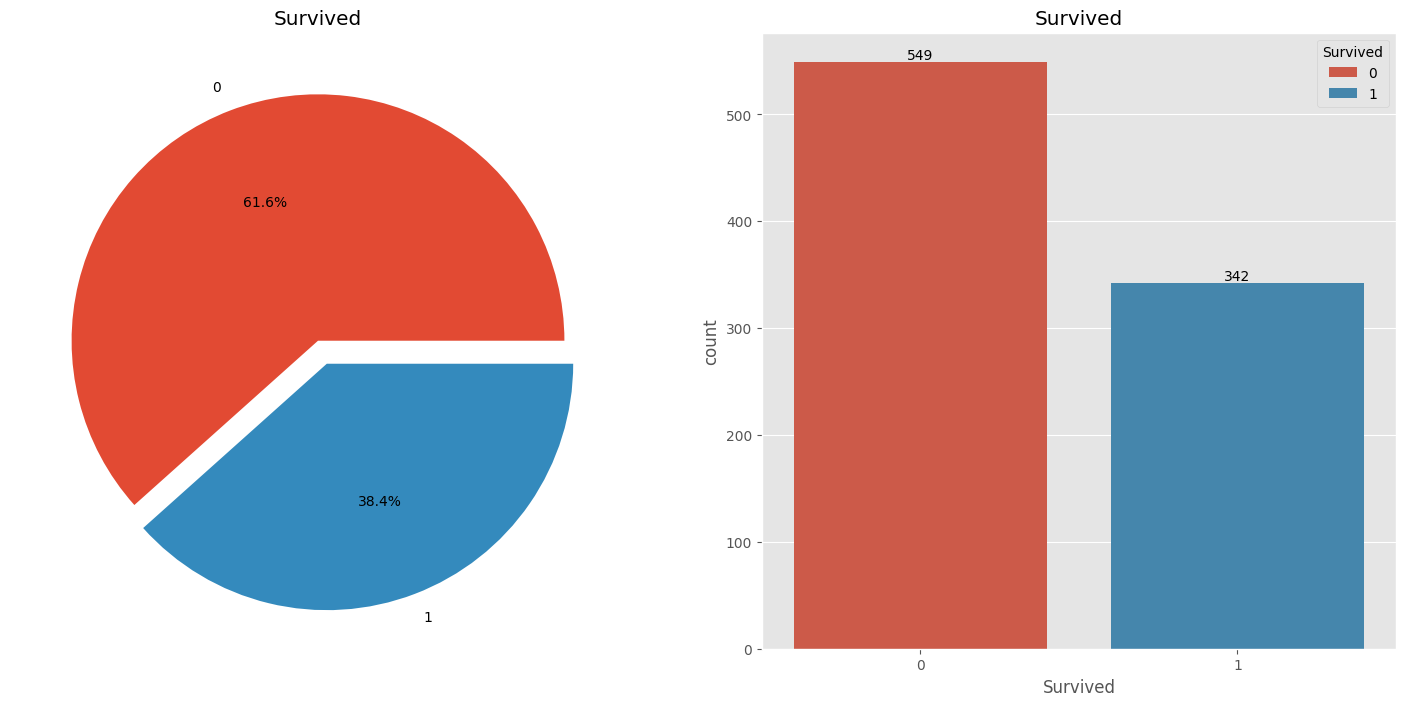

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%.1f%%', explode=[0, 0.1])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

res = sns.countplot(x='Survived', hue='Survived', data=df, ax=ax[1])
for i in res.containers :
  res.bar_label(i,)
ax[1].set_title('Survived')

plt.show()

### Survival pattern based on Sex

In [6]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

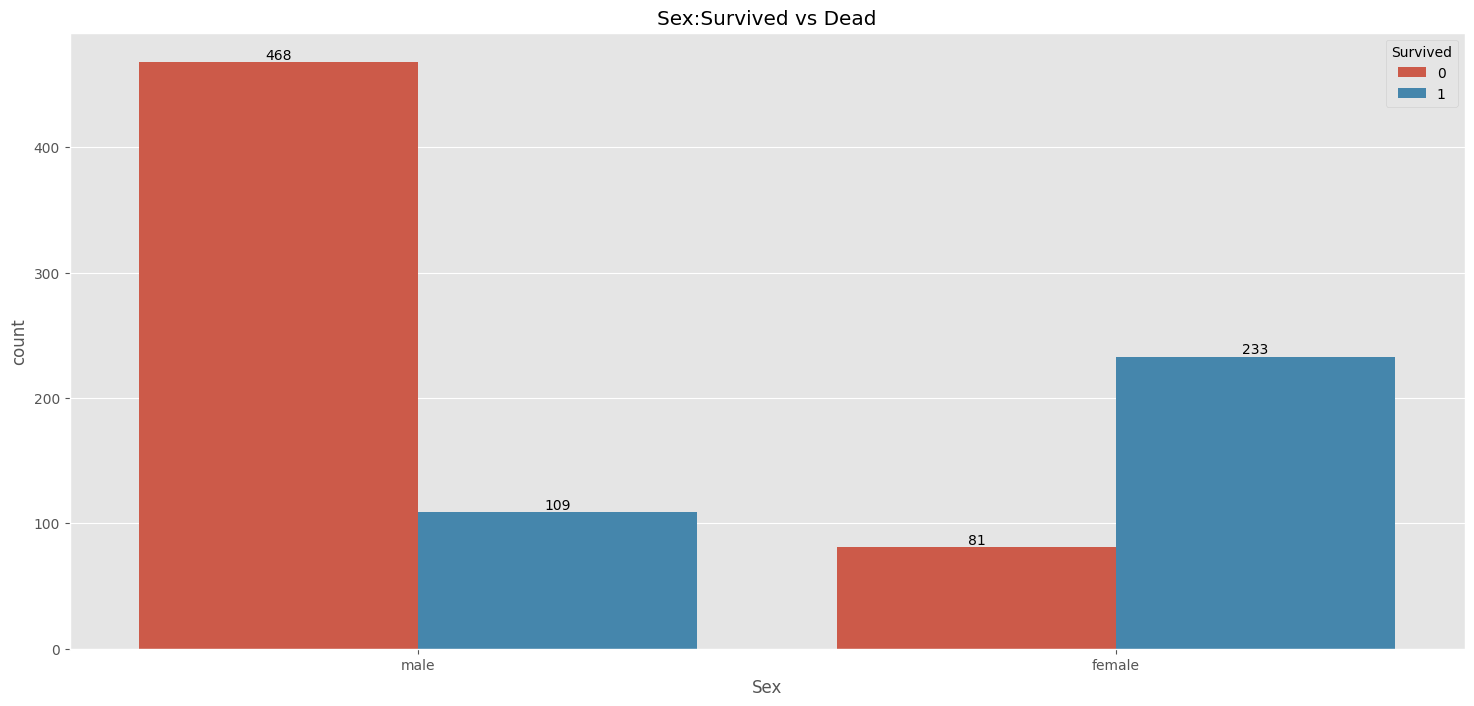

In [7]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))

res = sns.countplot(x='Sex', hue='Survived', data=df, ax=ax)
for i in res.containers :
  res.bar_label(i,)
ax.set_title('Sex:Survived vs Dead')
plt.show()

## Survival pattern based on ticket class

In [8]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='viridis')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


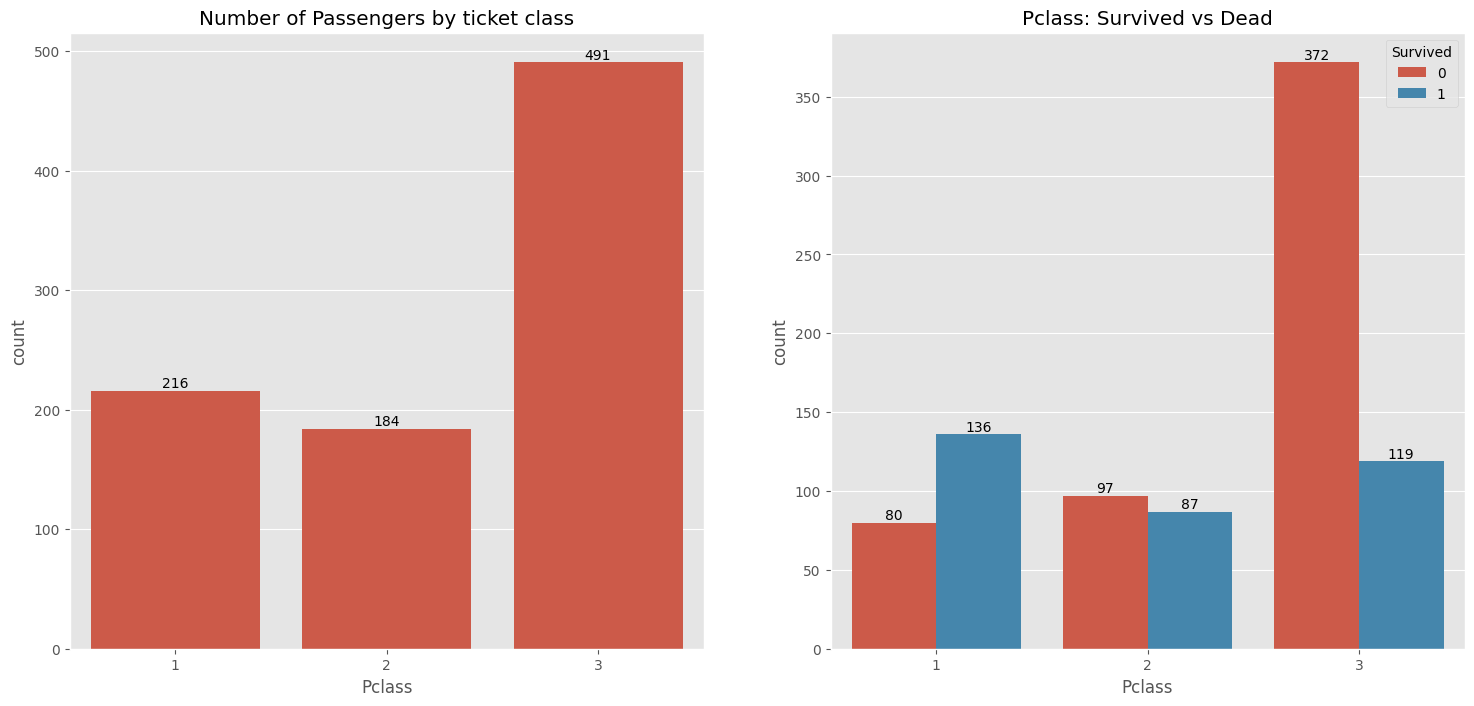

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
counts = df['Pclass'].value_counts().reset_index()
res = sns.barplot(data=counts, x='Pclass', y='count', ax=ax[0])
res.bar_label(res.containers[0])
ax[0].set_title('Number of Passengers by ticket class')

res = sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[1])
for i in res.containers :
  res.bar_label(i)
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

## Patterns with both ticket class and sex

In [10]:
pd.crosstab([df.Sex, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='viridis')

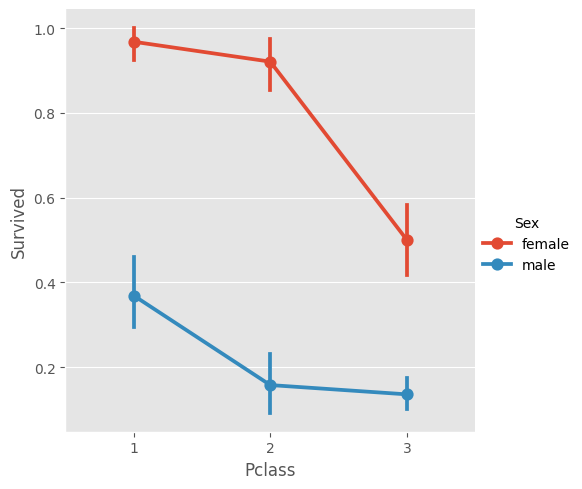

In [11]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')
plt.show()

## Age pattern

In [12]:
print('Oldest Passenger was of:', df['Age'].max(), 'Years')
print('Youngest Passenger was of:', df['Age'].min(), 'Years')
print('Average Age on the ship:', df['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


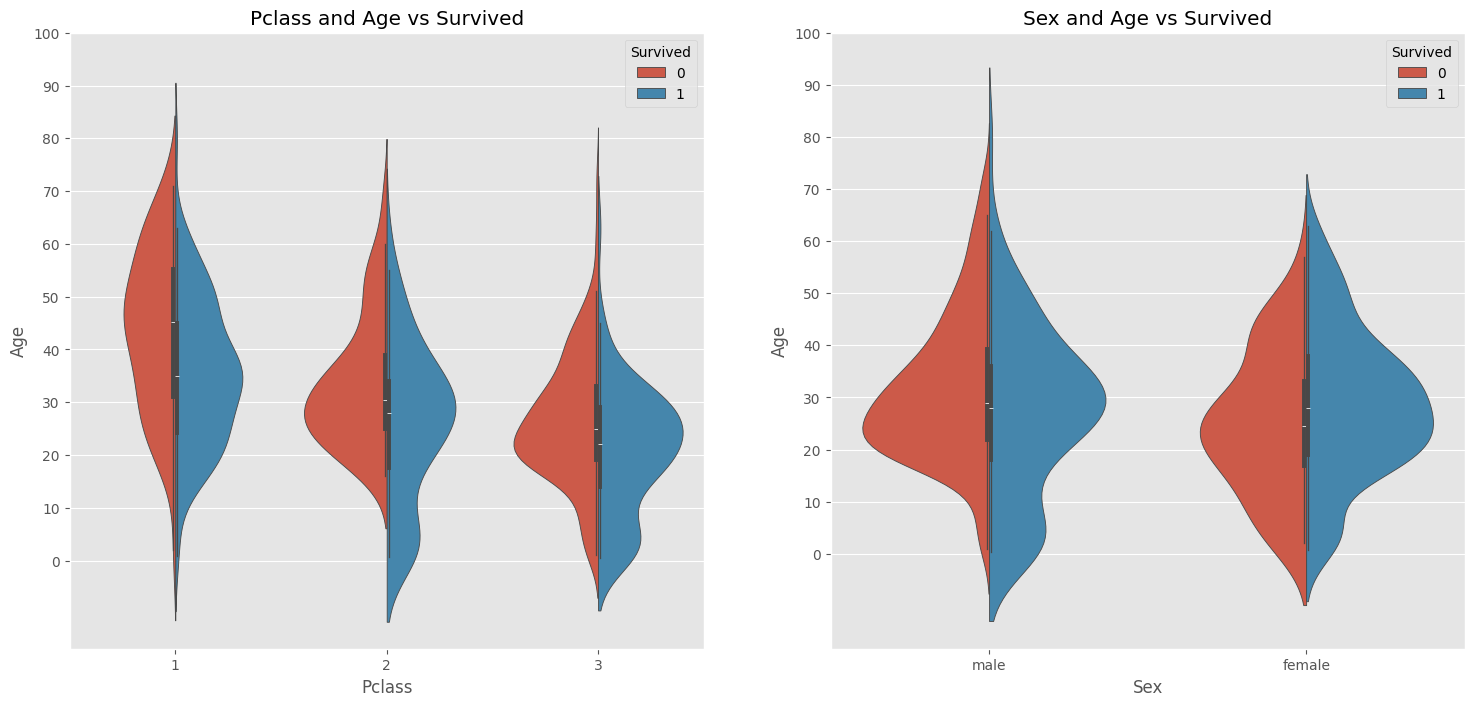

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

### Imputing age values

Get salutations

In [14]:
df['Initial'] = 0
# Extracting the salutaions
for i in df :
  df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='viridis')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Fixing mispelled initials

In [15]:
df['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [16]:
df.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.845638
Mr,32.739609
Mrs,35.873874
Other,45.888889


imputing null values

In [17]:
df.loc[(df.Age.isnull()) & (df.Initial == 'Mr'), 'Age'] = 33
df.loc[(df.Age.isnull()) & (df.Initial == 'Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull()) & (df.Initial == 'Master'), 'Age'] = 5
df.loc[(df.Age.isnull()) & (df.Initial == 'Miss'), 'Age'] = 22
df.loc[(df.Age.isnull()) & (df.Initial == 'Other'), 'Age'] = 46

check if any null left

In [18]:
df.Age.isnull().any()

False

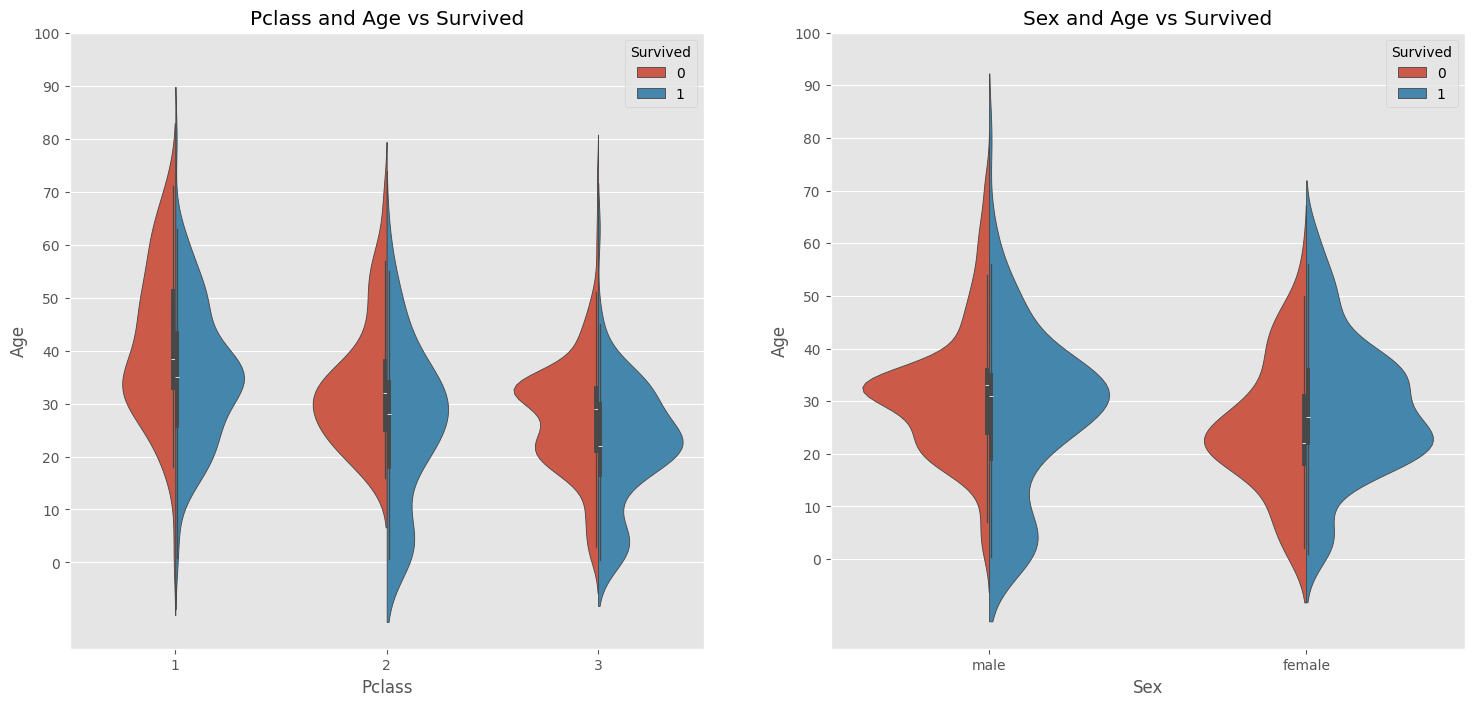

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()